<font face="黑体" size=5>·调库</font>

In [56]:
!pip install torch

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [57]:
import torch
print(torch.__version__)  # torch.__version__ 返回安装的 PyTorch 的版本号
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
from torch.utils.data import random_split
import time
start_time = time.time()
print(torch.cuda.is_available())

1.13.1+cu116
True


<font face="黑体" size=5>·读取数据</font>

<font face="黑体" size=3>

每一行为一组数据；

每一行数据的前三列为材料分界点、分界点两侧的EI值；

第四列起有1001列，是将材料全长L=10m划分为一千等长段后每一段的挠度值。
</font>

In [58]:
d_data = pd.read_csv('./Random_E1E2_100k_of_1000_Omega=100_EI1=1e11_EI2=2e11_phr.csv',na_values = ['NA'])
d_data.head()

,boundary,EI1,EI2,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999,x_1000
0,439,8.927584e+10,2.108416e+11,-0.0,0.035663,0.071326,0.106988,0.142648,0.178305,0.213960,...,0.232805,0.206943,0.181079,0.155214,0.129347,0.103479,0.077610,0.051741,0.025870,-1.157934e-15
1,294,9.491129e+10,2.127679e+11,-0.0,0.027796,0.055591,0.083385,0.111178,0.138969,0.166757,...,0.193561,0.172060,0.150556,0.129051,0.107545,0.086037,0.064529,0.043020,0.021510,-2.294901e-15
2,26,8.144741e+10,2.015911e+11,-0.0,0.020788,0.041576,0.062362,0.083147,0.103929,0.124708,...,0.186009,0.165347,0.144683,0.124017,0.103350,0.082681,0.062012,0.041342,0.020671,-1.614660e-15
3,362,9.964117e+10,2.064593e+11,-0.0,0.030096,0.060192,0.090287,0.120381,0.150472,0.180561,...,0.208521,0.185358,0.162192,0.139025,0.115856,0.092686,0.069516,0.046344,0.023172,-6.338430e-16
4,886,9.078968e+10,2.184879e+11,-0.0,0.045748,0.091496,0.137242,0.182987,0.228730,0.274470,...,0.396930,0.352832,0.308732,0.264630,0.220527,0.176423,0.132318,0.088212,0.044106,-0.000000e+00


<font face="黑体" size=5>·输出数据特征 排除数据中出现异常的可能</font>

In [59]:
d_data.describe()

,boundary,EI1,EI2,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999,x_1000
count,100000.000000,1.000000e+05,1.000000e+05,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,500.841430,9.995603e+10,2.000006e+11,0.0,0.033734,0.067468,0.101200,0.134931,0.168660,0.202387,...,0.265209,0.235747,0.206283,0.176817,0.147350,0.117881,0.088412,0.058942,0.029471,9.901296e-11
std,289.122203,1.155323e+10,1.157132e+10,0.0,0.008359,0.016717,0.025076,0.033434,0.041793,0.050151,...,0.072832,0.064740,0.056647,0.048555,0.040462,0.032370,0.024278,0.016185,0.008093,3.007173e-09
min,0.000000,8.000033e+10,1.800002e+11,-0.0,0.018942,0.037883,0.056824,0.075764,0.094703,0.113641,...,0.170447,0.151513,0.132578,0.113641,0.094703,0.075764,0.056824,0.037883,0.018942,-1.084939e-14
25%,251.000000,8.993883e+10,1.899619e+11,-0.0,0.026362,0.052723,0.079083,0.105441,0.131798,0.158151,...,0.202133,0.179680,0.157225,0.134768,0.112309,0.089849,0.067387,0.044925,0.022463,-2.258348e-15
50%,500.000000,9.993501e+10,2.000423e+11,-0.0,0.034399,0.068797,0.103195,0.137591,0.171985,0.206377,...,0.246257,0.218901,0.191543,0.164183,0.136821,0.109459,0.082095,0.054730,0.027365,-5.561094e-16
75%,752.000000,1.099227e+11,2.100155e+11,0.0,0.039900,0.079799,0.119697,0.159594,0.199488,0.239380,...,0.319521,0.284024,0.248525,0.213024,0.177522,0.142019,0.106515,0.071011,0.035505,0.000000e+00
max,1001.000000,1.199991e+11,2.199998e+11,-0.0,0.052056,0.104112,0.156167,0.208220,0.260270,0.312317,...,0.468124,0.416116,0.364106,0.312095,0.260081,0.208067,0.156051,0.104034,0.052017,1.301468e-07


<font face="黑体" size=5>·加载数据集并划分</font>

In [60]:
class CSVDataset(Dataset):
    def __init__(self, path):
        df = pd.read_csv(path, header=None,skiprows=1, dtype=float)
        # 设置神经网络的输入与输出
        self.X = df.values[1:, 3:1000:4]
        self.y = df.values[1:,0:3]
        self.X = self.X.astype('float32')
        self.y = self.y.astype('float32')
        #单位化预测数据
        self.y[:, 0] /= 100
        self.y[:, 1:] /= 100000000000
        #print(self.y)
 
    def __len__(self):
        return len(self.X)
 
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, n_test=0.3):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

In [61]:
data_path = './Random_E1E2_100k_of_1000_Omega=100_EI1=1e11_EI2=2e11_phr.csv'

dataset = CSVDataset(data_path)
print(f'输入矩阵的形状是：{dataset.X.shape}')
print(f'输出矩阵的形状是：{dataset.y.shape}')

输入矩阵的形状是：(99999, 250)
输出矩阵的形状是：(99999, 3)


In [62]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

n_test = 0.3 
test_size = round(n_test * len(dataset.X))
train_size = len(dataset.X) - test_size

# 根据尺寸划分训练集和测试集并返回
train, test = random_split(dataset, [train_size, test_size])

# 让我们查看一下创建的训练集的类型和长度
print(f'划分的训练集的数据类型是：{type(train)}')
print(f'划分的训练集长度是：{len(train)}')
print(f'划分的测试集长度是：{len(test)}')

划分的训练集的数据类型是：<class 'torch.utils.data.dataset.Subset'>
划分的训练集长度是：69999
划分的测试集长度是：30000


In [63]:
train_dl = DataLoader(train, batch_size=32, shuffle=True)
test_dl = DataLoader(test, batch_size=1024, shuffle=False)
print(len(train_dl.dataset), len(test_dl.dataset))

69999 30000


In [64]:
n_inputs = len(train_dl)
print(f'共有 {n_inputs} 个 batches')

共有 2188 个 batches


<font face="黑体" size=5>·定义模型</font>

In [65]:
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torch.nn import Identity

# 定义模型
class MLP(Module):
    # 定义模型属性
    def __init__(self, n_inputs):
        super(MLP, self).__init__()

        # 输入层
        self.hidden1 = Linear(n_inputs,150)
        xavier_uniform_(self.hidden1.weight)

        # 第二层
        self.hidden2 = Linear(150, 100)
        xavier_uniform_(self.hidden2.weight)

        # 第三层
        self.hidden3 = Linear(100, 50)
        xavier_uniform_(self.hidden3.weight)

        #第四层
        #self.hidden4 = Linear(100, 50)
        #xavier_uniform_(self.hidden4.weight)

        # 输出层
        self.output = Linear(50, 3)
 
    # 前向传播方法
    def forward(self, X):
        # 输入到第一个隐藏层
        X = self.hidden1(X)
        if torch.isnan(X).any():
            print(f'Detected NaN in hidden1 output: {X}')
            raise ValueError('NaN detected in hidden1 output')
        
        # 第二个
        X = self.hidden2(X)
        if torch.isnan(X).any():
            print(f'Detected NaN in hidden2 output: {X}')
            raise ValueError('NaN detected in hidden1 output')
        
        # 第三个
        X = self.hidden3(X)
        if torch.isnan(X).any():
            print(f'Detected NaN in hidden3 output: {X}')
            raise ValueError('NaN detected in hidden1 output')
        
        # 第四个
        #X = self.hidden4(X)
        #if torch.isnan(X).any():
        #    print(f'Detected NaN in hidden4 output: {X}')
        #    raise ValueError('NaN detected in hidden1 output')
        
        # 输出层
        X=self.output(X)
        return X
 

<font face="黑体" size=5>·定义超参数</font>

<font face="黑体" size=3>

损失函数：均方误差（MSE）

优化器：随机梯度下降（SGD）

学习率：0.0002
</font>

In [66]:
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn import MSELoss

model = MLP(n_inputs=250)

In [67]:
train_on_gpu = torch.cuda.is_available()

print("Training on GPU" if train_on_gpu else "Training on CPU. No GPU is available.")

Training on GPU


In [68]:
from torchsummary import summary
import torch

# 查看是否有GPU设备
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model = model.to(device)

# 输出模型结构
summary(model, input_size=(1, 250), device=device)


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 150]          37,650
            Linear-2               [-1, 1, 100]          15,100
            Linear-3                [-1, 1, 50]           5,050
            Linear-4                 [-1, 1, 3]             153
Total params: 57,953
Trainable params: 57,953
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.22
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [69]:
if train_on_gpu:
    criterion = MSELoss().to(device)
else:
    criterion = MSELoss()
    
optimizer = SGD(model.parameters(), lr=0.0002, momentum=0.9)

<font face="黑体" size=5>·训练模型</font>

In [70]:
epoches = 50
train_loss_all = []
counter = 0
for epoch in range(epoches):
    # 枚举 mini-batches
    train_loss = 0
    train_num = 0
    for i, (inputs, targets) in enumerate(train_dl):
        counter += 1
        # 梯度清除
        optimizer.zero_grad()
        # 计算模型输出
        if train_on_gpu:
            inputs,targets=inputs.to(device),targets.cuda()
        yhat = model(inputs)
        # 计算损失
        #targets = torch.Tensor(targets)
        loss = criterion(yhat, targets)
        # 贡献度分配
        loss.backward()
        # 升级模型权重
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_num += inputs.size(0)
        if counter % 1000 == 0:
            print("Epoch: {}/{}...".format(epoch+1, epoches),
              "Step: {}...".format(counter),
            "Loss: {:.6f}...".format(loss.item()))
    
        
    train_loss_all.append(train_loss / train_num)

Epoch: 1/50... Step: 1000... Loss: 0.561759...
Epoch: 1/50... Step: 2000... Loss: 0.472675...
Epoch: 2/50... Step: 3000... Loss: 0.698171...
Epoch: 2/50... Step: 4000... Loss: 0.726108...
Epoch: 3/50... Step: 5000... Loss: 0.632689...
Epoch: 3/50... Step: 6000... Loss: 0.444222...
Epoch: 4/50... Step: 7000... Loss: 0.547883...
Epoch: 4/50... Step: 8000... Loss: 0.340288...
Epoch: 5/50... Step: 9000... Loss: 0.279819...
Epoch: 5/50... Step: 10000... Loss: 0.310594...
Epoch: 6/50... Step: 11000... Loss: 0.492054...
Epoch: 6/50... Step: 12000... Loss: 0.511424...
Epoch: 6/50... Step: 13000... Loss: 0.397571...
Epoch: 7/50... Step: 14000... Loss: 0.347191...
Epoch: 7/50... Step: 15000... Loss: 0.206178...
Epoch: 8/50... Step: 16000... Loss: 0.416818...
Epoch: 8/50... Step: 17000... Loss: 0.384446...
Epoch: 9/50... Step: 18000... Loss: 0.352961...
Epoch: 9/50... Step: 19000... Loss: 0.555535...
Epoch: 10/50... Step: 20000... Loss: 0.405815...
Epoch: 10/50... Step: 21000... Loss: 0.575312...

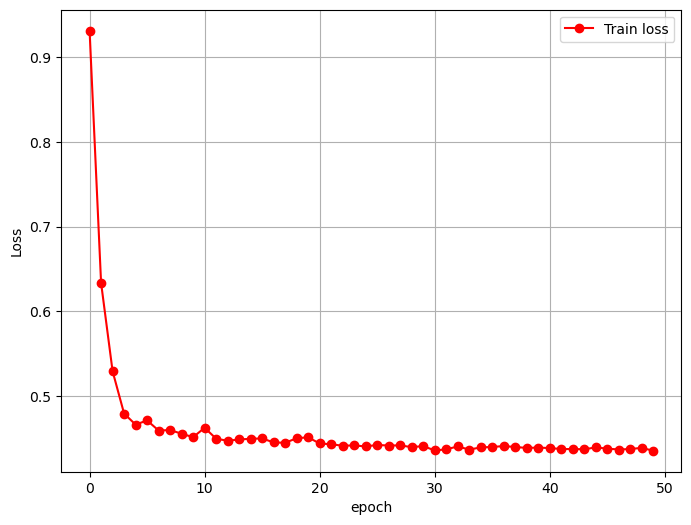

In [71]:
# 可视化损失函数的变换情况
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))
plt.plot(train_loss_all, 'ro-', label = 'Train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

<font face="黑体" size=5>·结果评估</font>

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import vstack

predictions, actuals, inputs_list = list(), list(), list()

n_inputs = len(test_dl)
for i, (inputs, targets) in enumerate(test_dl):
    if train_on_gpu:
        inputs,targets = inputs.to(device),targets.cuda()
    yhat = model(inputs)
    if train_on_gpu:
        yhat = yhat.cpu().detach().numpy()
    else:
        yhat = yhat.detach().numpy()
    if train_on_gpu:
        actual = targets.cpu().numpy()
    else:
        actual = targets.numpy()

    actual = actual.reshape((len(actual), -1))
    yhat = yhat.reshape((len(yhat), -1))

    predictions.append(yhat)
    actuals.append(actual)
    if train_on_gpu:
        inputs_list.append(inputs.cpu().detach().numpy())
    else:
        inputs_list.append(inputs.detach().numpy())

predictions, actuals = vstack(predictions), vstack(actuals)
predictions[:,0] *= 100
actuals[:, 0] *= 100
predictions[:,1:] *= 100000000000
actuals[:,1:] *= 100000000000
inputs_list = vstack(inputs_list)

<font face="黑体" size=5>·生成实际分界面——预测分界面的残差图</font>

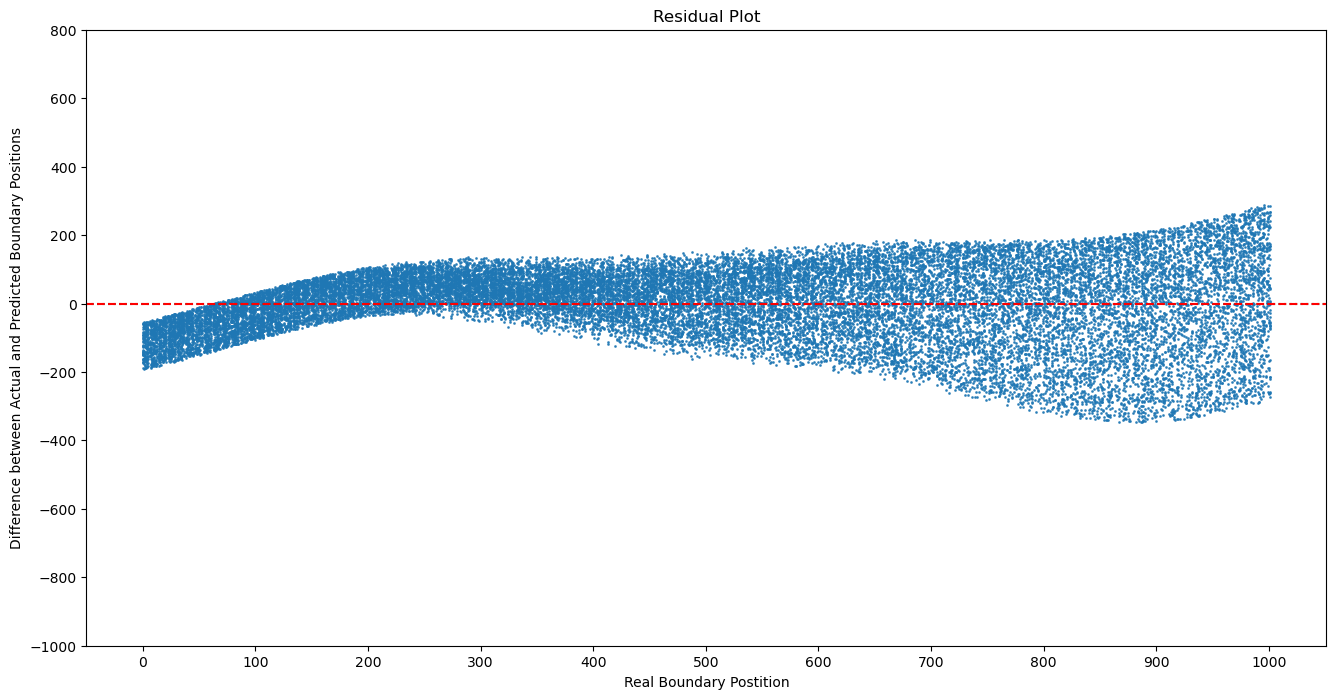

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import vstack

# 计算残差
residuals = actuals - predictions

output_dimension = 0

# 选择一个特征作为横轴数据
input_feature = actuals[:, output_dimension]

# 使用 seaborn.residplot 绘制残差图
plt.figure(figsize=(16,8))
sns.residplot(x=input_feature, y=residuals[:, output_dimension].flatten(), scatter_kws={'s': 1}, line_kws={'color': 'black', 'linestyle': '--'})

# 添加y=0的参考线
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Real Boundary Postition')
plt.ylabel('Difference between Actual and Predicted Boundary Positions')

# 设置横轴刻度
plt.xticks(np.arange(min(input_feature), max(input_feature)+0.1, 100))
plt.yticks(np.arange(-1000, 1000, 200))
plt.show()


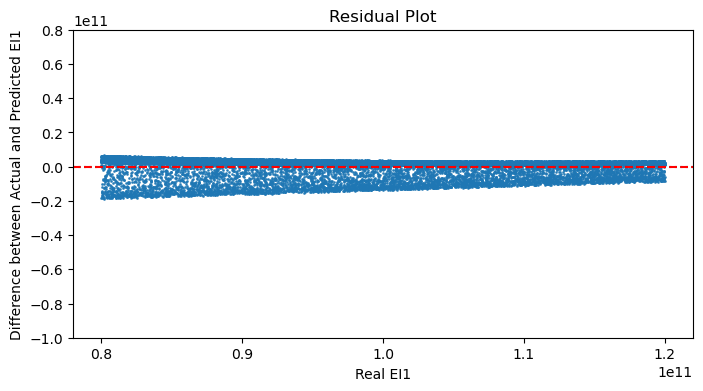

In [74]:
output_dimension = 1

# 选择一个特征作为横轴数据
input_feature = actuals[:, output_dimension]
plt.figure(figsize=(8,4))
sns.residplot(x=input_feature, y=residuals[:, output_dimension].flatten(), scatter_kws={'s': 1}, line_kws={'color': 'black', 'linestyle': '--'})

# 添加y=0的参考线
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Real EI1')
plt.ylabel('Difference between Actual and Predicted EI1')



# 设置横轴刻度
plt.xticks(np.arange(min(input_feature), max(input_feature)+10000000000, 10000000000))
plt.yticks(np.arange(-100000000000, 100000000000, 20000000000))
plt.show()

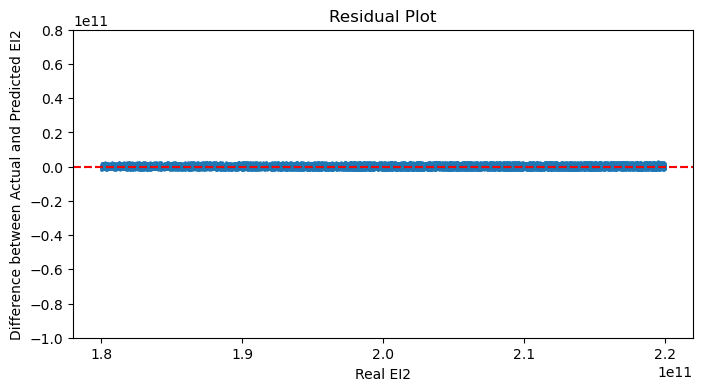

In [75]:
output_dimension = 2

# 选择一个特征作为横轴数据
input_feature = actuals[:, output_dimension]
plt.figure(figsize=(8,4))
sns.residplot(x=input_feature, y=residuals[:, output_dimension].flatten(), scatter_kws={'s': 1}, line_kws={'color': 'black', 'linestyle': '--'})

# 添加y=0的参考线
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Real EI2')
plt.ylabel('Difference between Actual and Predicted EI2')

# 设置横轴刻度
plt.xticks(np.arange(min(input_feature), max(input_feature)+10000000000, 10000000000))
plt.yticks(np.arange(-100000000000, 100000000000, 20000000000))
plt.show()

<font face="黑体" size=5>·预测外来数据</font>

In [76]:
# 对一行数据进行预测
def predict(inputs, model):

    # 做出预测
    if train_on_gpu:
        inputs = inputs.to(device)
    yhat = model(inputs)
    if train_on_gpu:
        yhat = yhat.cpu().detach().numpy()
    else:
        yhat = yhat.detach().numpy()

    return yhat

In [79]:
import random
from torch import Tensor

idx = random.randint(0,1000)
test_data = pd.read_csv('./test_E1E2_1000_of_1000_Omega=100_EI1=1e11_EI2=2e11_wbx.csv')

selected_row = test_data.iloc[idx]
input_data = selected_row.iloc[3:1000:4].values.reshape(1,-1)
input_data = Tensor(input_data)
x_test = predict(input_data, model)
x_real = selected_row.iloc[0:3].values
x_test[0][0] = x_test[0][0]*100
x_test[0][1] = x_test[0][1]*100000000000
x_test[0][2] = x_test[0][2]*100000000000

print(f"Boundary real:{x_real[0]} predicted:{x_test[0][0]}")
print(f"EI1 real:{x_real[1]} predicted:{x_test[0][1]}")
print(f"EI2 real:{x_real[2]} predicted:{x_test[0][2]}")


Boundary real:495.0 predicted:403.3801574707031
EI1 real:116116791707.94595 predicted:102530899968.0
EI2 real:208127238647.51605 predicted:201382166528.0


<font face="黑体" size=5>·运行总时间</font>

In [78]:
end_time = time.time()
total_time = end_time - start_time

print("Total Execution Time: {:.2f} seconds".format(total_time))

Total Execution Time: 243.98 seconds
